In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import os
import seaborn as sns

In [ ]:
#A combination of a players basic statistics and advanced statistics will give the best prediction of an NBA players salary.

In [339]:
df = pd.read_csv(r'C:\Users\Devin\Documents\NBAPlayers2017-2019.csv')
print(df)
df.describe()

                  Player    Salary  Adjusted Salary  Age    MP   G  GS    FG  \
0            Bruce Brown    838464           904036   22  19.6  74  56   1.7   
1          Dillon Brooks    815615           904653   22  28.7  82  74   4.1   
2            Maxi Kleber    815615           904653   24  21.4  59  36   2.5   
3          Royce O'Neale    815615           904653   24  16.7  69   4   1.7   
4    Sindarius Thornwell    815615           904653   23  15.8  73  17   1.4   
..                   ...       ...              ...  ...   ...  ..  ..   ...   
512           Kyle Lowry  32700000         35257329   32  34.0  65  65   4.7   
513         LeBron James  33285709         36919409   33  36.9  82  82  10.5   
514           Chris Paul  35654150         38442511   33  32.0  58  58   5.2   
515    Russell Westbrook  35665000         38454209   30  36.0  73  73   8.6   
516        Stephen Curry  37457154         40386520   30  33.8  69  69   9.2   

      FGA   2P   2PA   3P   3PA   FT  F

,Salary,Adjusted Salary,Age,MP,G,GS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,PER,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg,DRtg,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,5.170000e+02,5.170000e+02,517.000000,517.0000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,503.000000,517.000000,517.000000,517.000000,517.000000,515.000000,515.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,515.000000,517.000000,516.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,8.859894e+06,9.685586e+06,26.386847,24.8706,72.326886,39.682785,4.243133,9.123404,3.098259,5.963443,1.144101,3.159768,1.829014,2.366344,1.040619,3.552805,4.590716,2.475048,0.795551,0.504449,1.402901,2.052611,11.458994,0.466718,0.516008,0.328026,0.529499,0.762975,0.561675,13.707544,0.350427,0.250676,4.788008,15.273501,10.041393,13.559188,1.484720,1.699807,12.558058,18.995551,108.500000,109.727273,1.689362,1.490135,3.176596,0.085983,-0.802515,-0.122050,-0.924758,0.799226
std,8.297284e+06,9.059820e+06,4.200551,6.6964,7.187111,29.873830,2.064225,4.340223,1.830411,3.393244,0.846555,2.191891,1.403280,1.721802,0.848490,1.823527,2.501742,1.844932,0.392665,0.428038,0.791972,0.579643,5.789658,0.062556,0.059127,0.097878,0.046872,0.094992,0.043897,6.349785,0.216172,0.144521,3.936902,7.566830,5.208151,8.780843,0.740141,1.547222,4.891988,5.697674,16.909755,4.044938,1.991304,1.107462,2.817638,0.101025,3.558865,1.709939,4.623885,1.386228
min,8.156150e+05,9.040360e+05,19.000000,4.9000,58.000000,0.000000,0.300000,0.800000,0.200000,0.500000,0.000000,0.000000,0.000000,0.100000,0.100000,0.500000,0.700000,0.300000,0.100000,0.000000,0.200000,0.600000,1.000000,0.330000,0.364000,0.000000,0.378000,0.300000,0.417000,-41.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,-2.800000,-0.500000,-1.700000,-1.065000,-33.000000,-21.700000,-54.700000,-2.000000
25%,2.328652e+06,2.581102e+06,23.000000,19.8000,67.000000,10.000000,2.700000,5.900000,1.700000,3.400000,0.500000,1.500000,0.900000,1.200000,0.500000,2.200000,2.900000,1.200000,0.500000,0.200000,0.800000,1.700000,7.200000,0.423000,0.473000,0.314500,0.499000,0.709000,0.534000,10.700000,0.208000,0.164000,2.000000,10.500000,6.400000,7.200000,1.000000,0.700000,9.800000,15.100000,103.000000,107.000000,0.100000,0.700000,1.100000,0.055000,-2.200000,-0.800000,-2.500000,-0.100000
50%,5.725000e+06,6.261691e+06,26.000000,25.3000,73.000000,37.000000,3.800000,8.300000,2.700000,5.200000,1.100000,3.000000,1.500000,2.000000,0.800000,3.100000,4.000000,1.900000,0.700000,0.400000,1.200000,2.000000,10.200000,0.452000,0.511000,0.352000,0.525000,0.779000,0.560000,13.200000,0.364000,0.232000,3.400000,14.100000,8.800000,10.900000,1.400000,1.300000,11.800000,18.200000,110.000000,110.000000,1.200000,1.300000,2.700000,0.092000,-0.700000,-0.100000,-0.800000,0.400000
75%,1.353753e+07,1.460634e+07,29.000000,30.6000,79.000000,70.000000,5.500000,11.400000,4.200000,7.900000,1.700000,4.600000,2.300000,3.000000,1.400000,4.400000,5.500000,3.200000,1.000000,0.700000,1.800000,2.500000,14.500000,0.497000,0.553000,0.378000,0.560000,0.834000,0.589000,17.200000,0.499000,0.315000,6.800000,18.500000,13.100000,17.800000,1.800000,2.300000,14.500000,22.300000,116.000000,112.000000,2.500000,2.100000,4.800000,0.127000,0.800000,0.700000,1.000000,1.300000
max,3.745715e+07,4.038652e+07,42.000000,36.9000,82.000000,82.000000,10.800000,24.500000,9.700000,17.300000,5.100000,13.200000,9.700000,11.000000,5.400000,11.100000,16.000000,10.700000,2.400000,2.700000,5.000000,3.800000,36.100000,0.694000,0.699000,0.529000,0.694000,0.928000,0.692000,41.900000,1.000000,2.000000,22.300000,100.000000,55.900000,46.500000,5.900000,10.000000,50

In [296]:
df.loc[:,'Adjusted Salary'].mean()


9685586.01934236

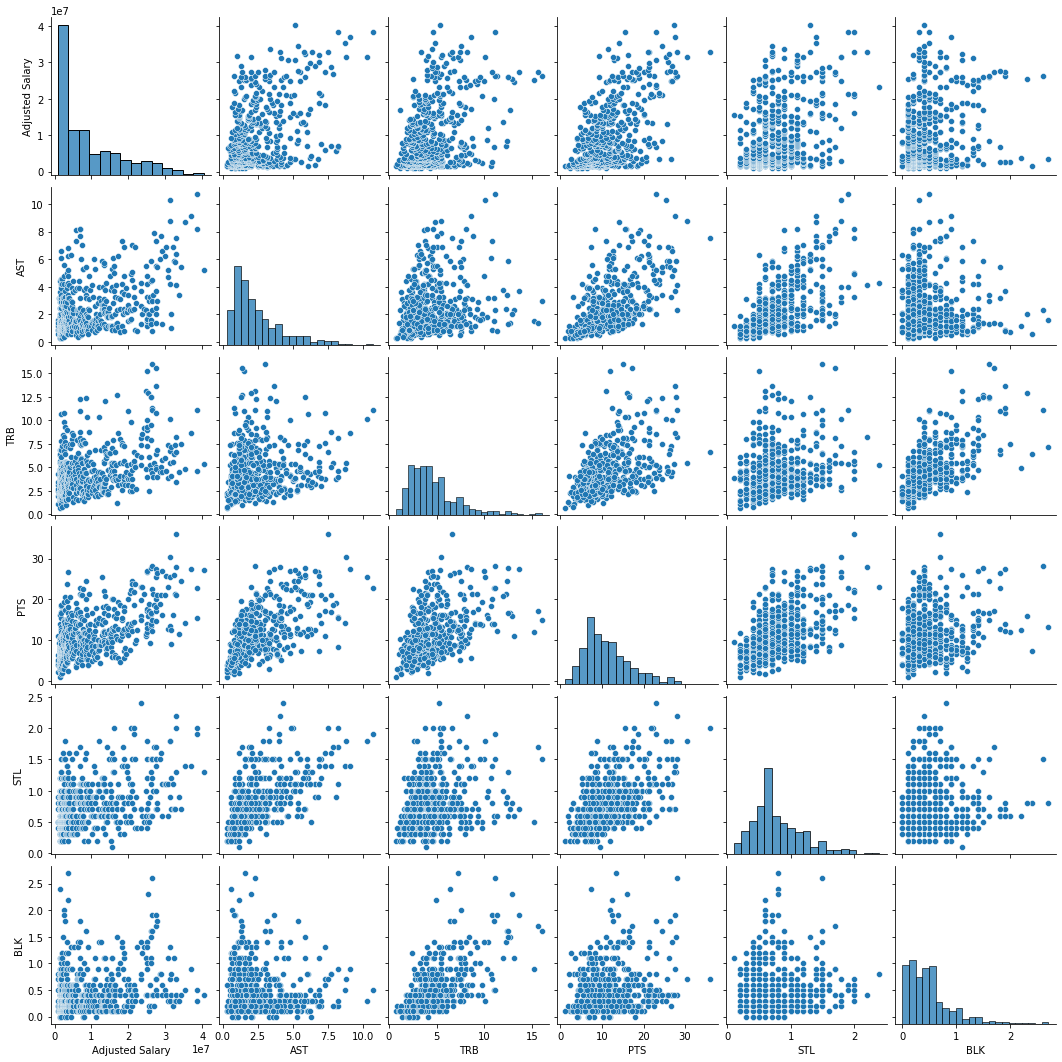

In [411]:
basic_stats = df[['Adjusted Salary','AST','TRB','PTS','STL','BLK']]
#sns.pairplot(df[['Adjusted Salary','AST','TRB','PTS','STL','BLK','Age','G','TOV','PF','FGA']]) 
sns.pairplot(basic_stats) 

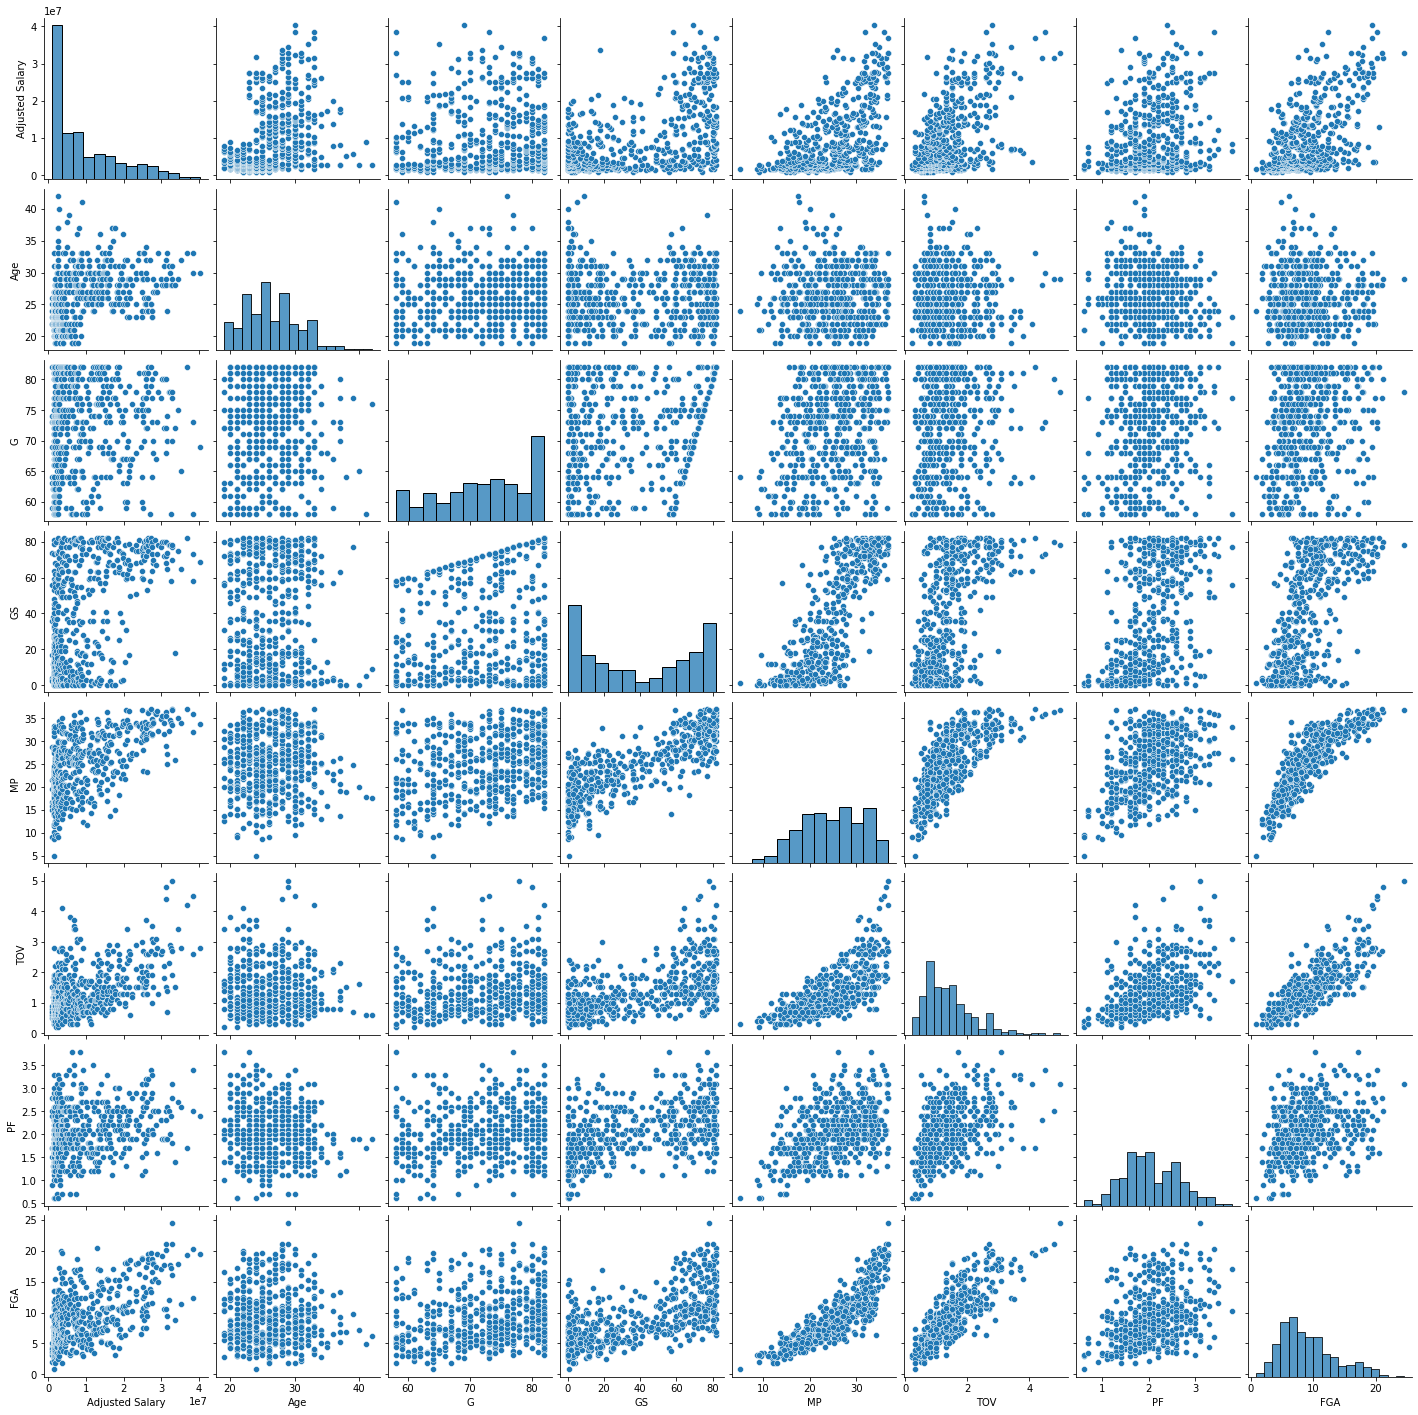

In [544]:
basic_stats2 = df[['Adjusted Salary','Age','G','GS','MP','TOV','PF','FGA']]
sns.pairplot(basic_stats2) 

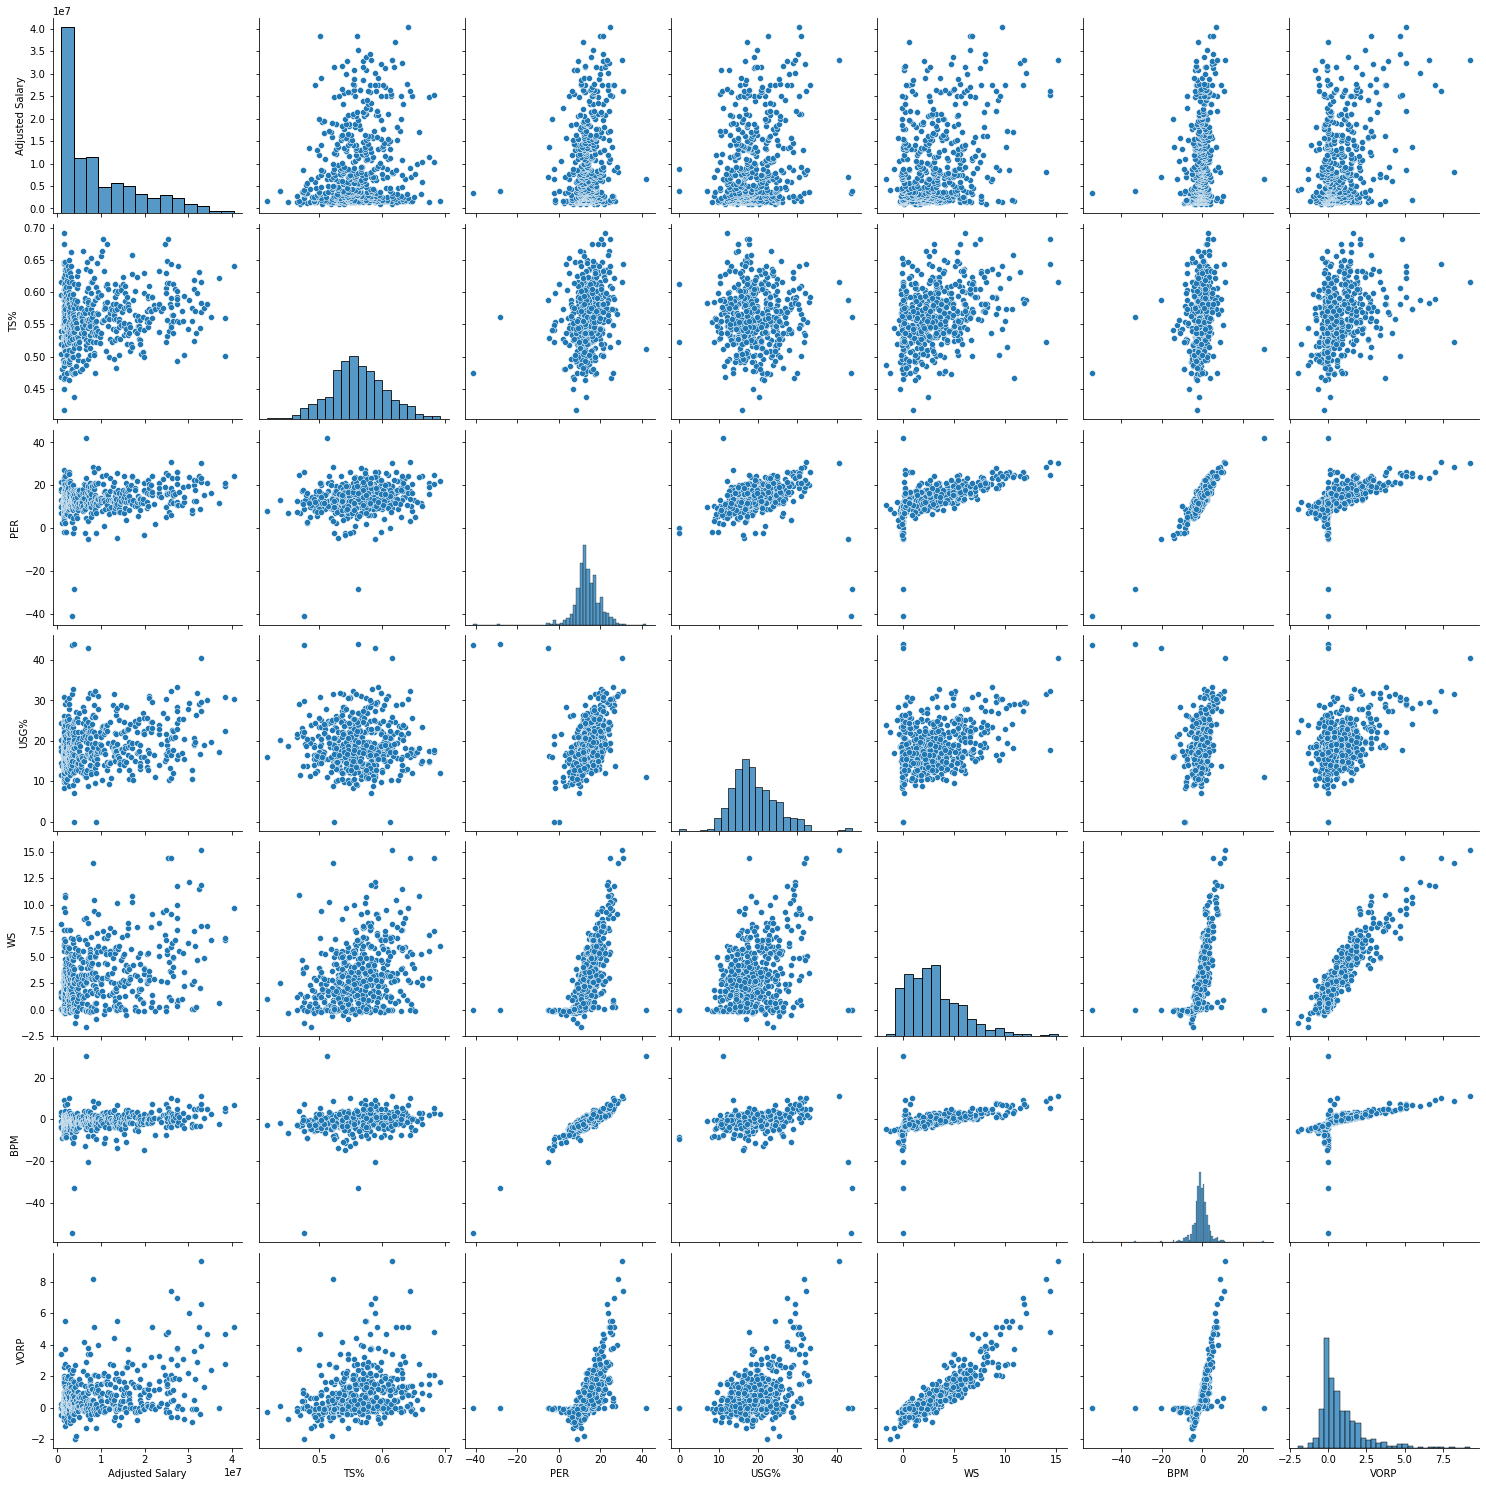

In [407]:
advanced_stats = df[['Adjusted Salary','TS%','PER','USG%', 'WS','BPM','VORP']]
sns.pairplot(advanced_stats,height=3) 
#pairplot for advanced stats done separately for readability sake

<AxesSubplot:>

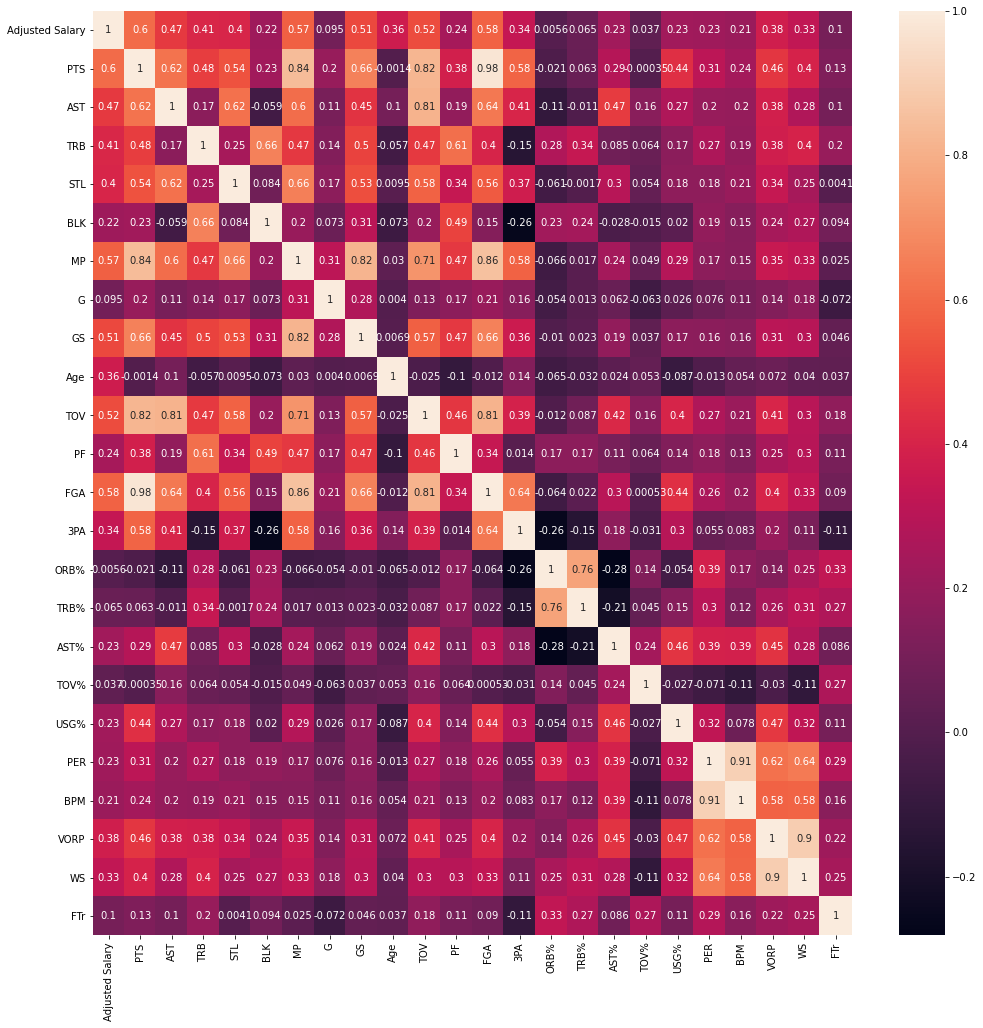

In [413]:
#heatmap
correlation = df[['Adjusted Salary','PTS','AST','TRB','STL','BLK','MP','G','GS','Age','TOV','PF','FGA','3PA','ORB%','TRB%','AST%','TOV%','USG%','PER','BPM','VORP','WS','FTr']].corr()
fig, ax=plt.subplots(figsize=(17,17))

sns.heatmap(correlation, annot=True, ax=ax)


In [557]:
#kMeans
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1) #try model with 3 clusters
clean_data2 = df._get_numeric_data().dropna(axis=1)# use only numeric data and remove missing data columns
clean_data2 = clean_data2[['Adjusted Salary','TOV', 'AST','TRB','PTS','MP','Age','G','TS%','PER','USG%', 'WS','BPM','VORP']]
#kmeans_model.fit(clean_data)#train model using clean data means using 
kmeans_model.fit(clean_data2)
labels = kmeans_model.labels_ #get the labels or cluster labels for each player
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<function matplotlib.pyplot.show(close=None, block=None)>

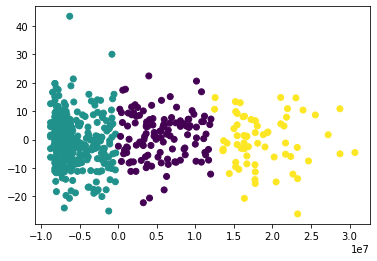

In [558]:
#plot players by cluster, principal component analysis (dimensionality reducing algorithm)to make 2dimesional clusters
from sklearn.decomposition import PCA
pca2 = PCA(2)
#plot_columns = pca2.fit_transform(clean_data)
plot_columns = pca2.fit_transform(clean_data2)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show


In [666]:

#Player1 = clean_data2.loc[df['Adjusted Salary'] == 9703852 ,:]  #start of array 0
#Player1 = clean_data2.loc[df['Adjusted Salary'] == 21715775 ,:]  
#Player1 = clean_data2.loc[df['Adjusted Salary'] == 9366941 ,:] # end of array 1

#Player1 = clean_data2.loc[df['PTS'] ==  15.0,:]
#Player1 = clean_data2.loc[df['Adjusted Salary'] == 22183339 ,:]  #array2
#Player1 = clean_data2.loc[df['Adjusted Salary'] == 2581102 ,:]
Player1 = clean_data2.loc[df['Adjusted Salary'] == 38442511 ,:] 

p1 = Player1.values.tolist()
print(p1)
kmeans_model.predict(p1) 
#clean_data2 = clean_data[['Adjusted Salary','TOV', 'AST','TRB','PTS','MP','Age','G','TS%','PER','USG%', 'WS','BPM','VORP']]

[[38442511.0, 2.6, 8.2, 4.6, 15.6, 32.0, 33.0, 58.0, 0.56, 19.7, 22.5, 6.6, 3.9, 2.8]]


array([2])

In [664]:
pd.set_option('display.max_columns',999)
#x=clean_data2.loc[130:200]
x=clean_data2.loc[0:50]
print(x) 

    Adjusted Salary  TOV  AST   TRB   PTS    MP  Age   G    TS%   PER  USG%  \
0            904036  0.6  1.2   2.5   4.3  19.6   22  74  0.469   6.9  11.5   
1            904653  1.5  1.6   3.1  11.0  28.7   22  82  0.531  10.2  14.6   
2            904653  0.7  0.9   2.7   6.5  21.4   24  59  0.596  17.1  24.4   
3            904653  0.8  1.4   3.4   5.0  16.7   24  69  0.540  13.2  18.2   
4            904653  0.7  0.9   1.9   3.9  15.8   23  73  0.519  21.6  20.3   
5            904653  0.9  0.9   4.3   5.3  14.9   25  63  0.616  18.3  18.4   
6            904653  0.5  0.6   1.1   2.3   9.0   26  64  0.504  10.0  17.5   
7           1164625  0.5  0.9   2.2   3.7  16.5   23  62  0.480   2.4  13.7   
8           1326193  1.2  3.2   2.3   9.3  21.8   22  73  0.549  12.8  19.1   
9           1429194  0.8  1.9   3.0   6.5  19.6   25  73  0.494  12.4  16.5   
10          1432923  0.3  0.3   2.2   2.7  15.8   23  73  0.473  12.4  23.1   
11          1454912  0.8  3.3   2.7   6.7  24.2   24

In [676]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['WS','AST','TRB','PTS','STL','BLK','Age','G','GS','TOV','FGA','3PA']],df[['Adjusted Salary']], test_size=0.20, random_state=1) #Split 20% testing and 80% training. 
#dependent variable is adjusted salary, the rest listed are the independent variables'ORB'
#df[['AST','MP','STL', 'G','GS','TRB','ORB%','PTS','Age','AST%', 'TRB%','TOV%','TOV','PER','USG%','BPM', 'VORP','PF','FGA','WS','FTr']]  '3PA','3P','2PA'
#[AST','TRB','PTS','STL','BLK','Age','G','TOV','PF','FGA']

In [677]:
#Linear regression model
lr = LinearRegression()
lr.fit(x_train, y_train)#training model
predictions = lr.predict(x_test) #make prediction on testing data
print(predictions)
print(y_test)

[[15352723.525304  ]
 [-4059795.04474793]
 [ 9103108.57515536]
 [ 7214139.59399244]
 [ 6827454.76806086]
 [12692948.19994664]
 [10078801.37375782]
 [18056556.4095096 ]
 [ 6390940.79109211]
 [ 5598242.70782169]
 [17659847.04129573]
 [ -119152.51860795]
 [ 2553574.64464617]
 [ 5344890.93292002]
 [ 7976242.0739696 ]
 [ 8628104.03526719]
 [ 3605776.22450075]
 [ 7730282.62106531]
 [21306921.40022154]
 [26813305.87383843]
 [12643602.15653258]
 [-1619503.83827   ]
 [ 6875567.74752007]
 [ 7926686.58965764]
 [13814476.00074036]
 [13164044.11215891]
 [ 3130552.10408956]
 [11277757.66341471]
 [ 8070077.20279385]
 [ 3636307.54873488]
 [16486915.66160862]
 [12378866.02463962]
 [ 1642084.54575767]
 [ 3555356.83787695]
 [ 8266807.47712936]
 [ 8258619.39335807]
 [ 7584882.60295095]
 [19113974.40598777]
 [ 9481915.85428075]
 [ 5853089.66877789]
 [ 8748001.63148924]
 [-1173235.66095414]
 [11569993.29700283]
 [ 1954665.18219197]
 [24318561.92252769]
 [ 2383945.17439333]
 [12149123.09168568]
 [ 9359380.58

In [678]:
#testing the model
lr_confidence = lr.score(x_test, y_test) #fives us the r^2 of the prediction
print(lr_confidence)

0.537962569330836
